In [ ]:
!pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=53bd6e953df8fd7b5bfe764b27e7664ae8b795638235e583798ed6ca46b6ec15
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from keras.engine.training import optimizer
from ann_visualizer.visualize import ann_viz

ModuleNotFoundError: No module named 'keras.engine'

In [ ]:
train_features_path = "/content/drive/MyDrive/Biomedic_Image_Processing/Malaria_Cell_Data_Set/cell_images/Data_Set/Train/Train_Features.csv"
train_label_path = "/content/drive/MyDrive/Biomedic_Image_Processing/Malaria_Cell_Data_Set/cell_images/Data_Set/Train/Train_Labels.csv"

test_features_path = "/content/drive/MyDrive/Biomedic_Image_Processing/Malaria_Cell_Data_Set/cell_images/Data_Set/Test/Test_Features.csv"
test_label_path = "/content/drive/MyDrive/Biomedic_Image_Processing/Malaria_Cell_Data_Set/cell_images/Data_Set/Test/Test_Labels.csv"

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
train_features = pd.read_csv(train_features_path,index_col=0)
train_labels = pd.read_csv(train_label_path,index_col=0)

test_features = pd.read_csv(test_features_path,index_col=0)
test_labels = pd.read_csv(test_label_path,index_col=0)

In [ ]:
le.fit(test_labels)
le.fit(train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [ ]:
x_train,y_train,x_test,y_test = train_features,train_labels,test_features,test_labels

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Dense(units=90, input_shape=(127,), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=50, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(units=20, activation='relu'))
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=100)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

360/360 [==============================] - 1s 2ms/step - loss: 0.7028 - accuracy: 0.4529


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
test_prediction = le.inverse_transform(y_pred)

360/360 [==============================] - 2s 5ms/step


In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.45286458333333335


<Axes: >

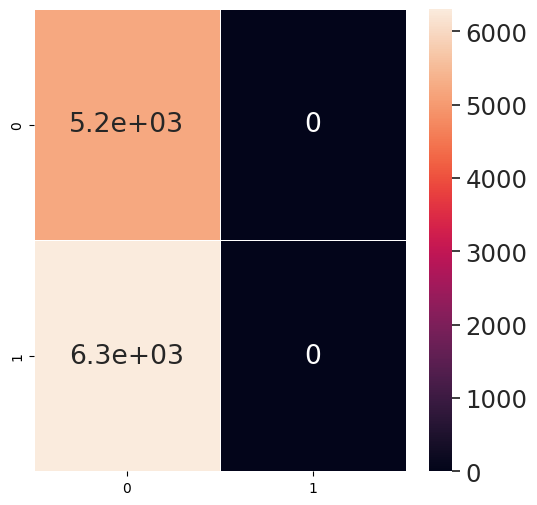

In [ ]:
cm = confusion_matrix(test_labels, y_pred)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [ ]:
ann_viz(model, view=True, filename="ANN", title="Artificial Neural Network")